In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");

v3.0


In [3]:
# Load initial wave
function get_stretch_param(Lx)
    param = get_grid_param(21,11)
    @unpack Nx = param
    param["save_interval"] = 100.0
    param["name"] = "soliton_stretch"
    param["Lx"] = Float64(Lx)
    param["Δx"] = Float64(Lx/Nx)
    return param
end
Lx = 80
param = get_stretch_param(Lx)
loaded, f, t = quiet_load_last_pde(param)
i = argmax(sum(f;dims=3)[:,1])
@unpack Nx = param
f = circshift(f,(Nx÷2)-i);

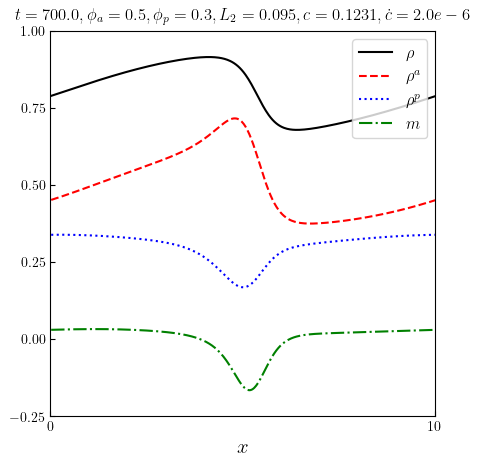

In [18]:
# Dispaly Profile
using PyPlot
PyPlot.close("all")
        rc("text", usetex=true)
        fig, ax = subplots(1,1,figsize=(5,5))
        @unpack Δx, Lx = param
        ax.plot(Δx:Δx:Lx, f[:,2]+f[:,1]+f[:,3]; 
        color = "black", linestyle = "-", label = L"\rho")
        ax.plot(Δx:Δx:Lx, f[:,1]+f[:,2]; 
        color = "red", linestyle = "--", label = L"\rho^a")
        ax.plot(Δx:Δx:Lx, f[:,3]; 
        color = "blue", linestyle = ":",label = L"\rho^p")
        ax.plot(Δx:Δx:Lx, f[:,2]-f[:,1]; 
        color = "green", linestyle = "-.", label = L"m")

        d2(x) = round(x; digits = 2)
        d4(x) = round(x; digits = 4)
        d6(x) = round(x; digits = 6)
        normf, c1, dc = f_dot(param, f)
        latex_string = latexstring("\$ t = $(d2(t)), \\phi_a = $(param["ϕa"]), \\phi_p = $(param["ϕp"]), L_2 = $(d4(normf)), c = $(d4(c1)), {\\dot c} = $(d6(dc))\$")
        ax.set_title(latex_string, fontsize = 12)
        ax.get_xaxis().set_ticks(0:10.0:Lx)
        ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
        # ax.set_xlabel(L"x", fontsize = 15)
        #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
        ax.set_aspect((Lx/(1.25)))
        ax.axis([0,Lx,-0.25,1.0])
        ax.tick_params(direction = "in")
        ax.legend(loc= "upper right", fontsize = 12)
        ax.set_xlabel(L"x", fontsize = 15)
display(fig)

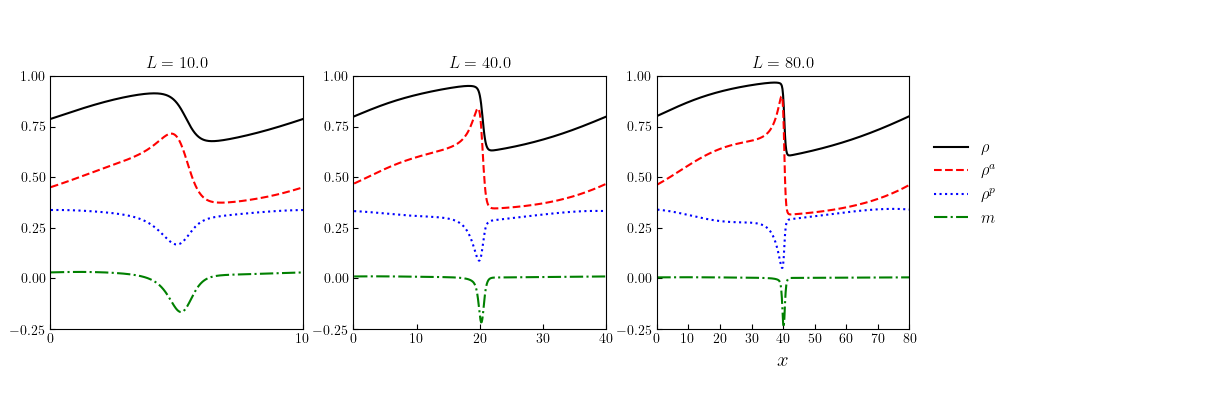

In [37]:
# Load initial wave
function get_stretch_param(Lx)
        param = get_grid_param(21,11)
                @unpack Nx = param
                param["save_interval"] = 100.0
                param["name"] = "soliton_stretch"
                param["Lx"] = Float64(Lx)
                param["Δx"] = Float64(Lx/Nx)
                return param
end
using PyPlot
        PyPlot.close("all")
        Lxs = [10,40,80]
        n = length(Lxs)
        rc("text", usetex=true)
        fig, axs = subplots(1,n+1,figsize=(15,5))
        font = 12
for (ax,Lx) in zip(axs,Lxs)
        param = get_stretch_param(Lx)
        loaded, f, t = quiet_load_last_pde(param)
        i = argmax(sum(f;dims=3)[:,1])
        @unpack Nx = param
        f = circshift(f,(Nx÷2)-i);
        # Dispaly Profile
        @unpack Δx, Lx = param
        ax.plot(Δx:Δx:Lx, f[:,2]+f[:,1]+f[:,3]; 
        color = "black", linestyle = "-", label = L"\rho")
        ax.plot(Δx:Δx:Lx, f[:,1]+f[:,2]; 
        color = "red", linestyle = "--", label = L"\rho^a")
        ax.plot(Δx:Δx:Lx, f[:,3]; 
        color = "blue", linestyle = ":",label = L"\rho^p")
        ax.plot(Δx:Δx:Lx, f[:,2]-f[:,1]; 
        color = "green", linestyle = "-.", label = L"m")

        # d2(x) = round(x; digits = 2)
        # d4(x) = round(x; digits = 4)
        # d6(x) = round(x; digits = 6)
        # normf, c1, dc = f_dot(param, f)
        # latex_string = latexstring("\$ t = $(d2(t)), \\phi_a = $(param["ϕa"]), \\phi_p = $(param["ϕp"]), L_2 = $(d4(normf)), c = $(d4(c1)), {\\dot c} = $(d6(dc))\$")
        latex_string = latexstring("\$ L = $(Lx) \$")
        ax.set_title(latex_string, fontsize = 12)
        ax.get_xaxis().set_ticks(0:10.0:Lx)
        ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
        # ax.set_xlabel(L"x", fontsize = 15)
        #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
        ax.set_aspect((Lx/(1.25)))
        ax.axis([0,Lx,-0.25,1.0])
        ax.tick_params(direction = "in")
        if Lx == Lxs[end]
                ax.set_xlabel(L"x", fontsize = 15)
                handles, labels = ax.get_legend_handles_labels()
                ax = axs[end]
                ax.spines["top"].set_visible(false)
                ax.spines["right"].set_visible(false)
                ax.spines["bottom"].set_visible(false)
                ax.spines["left"].set_visible(false)
                ax.xaxis.set_ticks([])
                ax.yaxis.set_ticks([])
                ax.legend(handles, labels, loc= "bottom left", bbox_to_anchor=(0.2, 0.7), fontsize= font, edgecolor = "white")
                # ax.legend(loc= "outer right", fontsize = 12, ax = axs[end])
        end
end
display(fig)
fig_name = "profiles"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)/Lxs=$(Lxs).pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


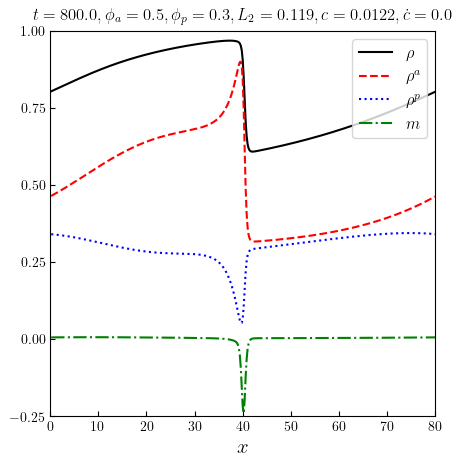

In [21]:
# Dispaly Profile
using PyPlot
PyPlot.close("all")
        rc("text", usetex=true)
        fig, ax = subplots(1,1,figsize=(5,5))
        @unpack Δx, Lx = param
        ax.plot(Δx:Δx:Lx, f[:,2]+f[:,1]+f[:,3]; 
        color = "black", linestyle = "-", label = L"\rho")
        ax.plot(Δx:Δx:Lx, f[:,1]+f[:,2]; 
        color = "red", linestyle = "--", label = L"\rho^a")
        ax.plot(Δx:Δx:Lx, f[:,3]; 
        color = "blue", linestyle = ":",label = L"\rho^p")
        ax.plot(Δx:Δx:Lx, f[:,2]-f[:,1]; 
        color = "green", linestyle = "-.", label = L"m")

        d2(x) = round(x; digits = 2)
        d4(x) = round(x; digits = 4)
        d6(x) = round(x; digits = 6)
        normf, c1, dc = f_dot(param, f)
        latex_string = latexstring("\$ t = $(d2(t)), \\phi_a = $(param["ϕa"]), \\phi_p = $(param["ϕp"]), L_2 = $(d4(normf)), c = $(d4(c1)), {\\dot c} = $(d6(dc))\$")
        ax.set_title(latex_string, fontsize = 12)
        ax.get_xaxis().set_ticks(0:10.0:Lx)
        ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
        # ax.set_xlabel(L"x", fontsize = 15)
        #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
        ax.set_aspect((Lx/(1.25)))
        ax.axis([0,Lx,-0.25,1.0])
        ax.tick_params(direction = "in")
        ax.legend(loc= "upper right", fontsize = 12)
        ax.set_xlabel(L"x", fontsize = 15)
display(fig)

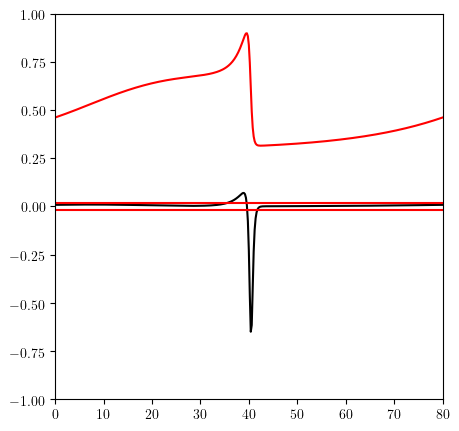

In [81]:
fig, ax = subplots(1,1,figsize=(5,5))
df= (f - circshift(f, (1,0)))/Δx
ddf = (circshift(df, (-1,0))-df)/Δx
dsfa = (f[:,1]+df[:,2]).*self_diff.(f[:,1]+f[:,2]+f[:,3])
ddsfa = (dsfa - circshift(dsfa, 1))/Δx
@unpack Δx, Lx = param
xx = Δx:Δx:Lx
# ax.plot(xx,Lx*(df[:,1]+df[:,2]); color = "red")
# ax.plot(xx,-Lx*df[:,3]/Δx; color = "blue")
# ax.plot(xx,Lx*(df[:,1]+df[:,2]+df[:,3]); color = "black")
# ax.plot(xx,(f[:,1]+f[:,2]+f[:,3].-1)./f[:,3]; color = "black")
# ax.plot(xx,(f[:,1]+f[:,2]+f[:,3]); color = "black")
ax.plot(xx,(df[:,1]+df[:,2]); color = "black")
# ax.plot(xx,(df[:,1]+df[:,2]+df[:,3])./(df[:,1]+df[:,2])/10; color = "green")
ax.plot(xx,(f[:,1]+f[:,2]); color = "red")
ax.plot(xx,0.02*ones(length(xx)); color = "red")
ax.plot(xx,-0.02*ones(length(xx)); color = "red")
# ax.plot(xx,Lx*(f[:,2]-f[:,1]); color = "green")
# ax.plot(xx,-Pe*Lx*(ddsfa); color = "green",linestyle="--")
ax.axis([0,Lx,-1,1])
display(fig)

In [20]:
using LaTeXStrings
function plot_phase(fig, ax, Pe; Lxs = [5,10,20])
    Pes = [Pe]
    axlims = [[0.0, 1.0, 0, 0.4]]
    axs = [ax]
    for (i,(ax, Pe, axlim)) in enumerate(zip(axs, Pes, axlims))
        # load binodal
            filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
            data = wload(filename)
            @unpack Pe, γs, ϕ1s, ϕ2s = data

        # plot binodal
            binod = ax.plot(gammas_converter_a(γs, ϕ1s), gammas_converter_p(γs, ϕ1s), color = "red", label = "Binodal")
            ax.plot(gammas_converter_a(γs, ϕ2s), gammas_converter_p(γs, ϕ2s), color = "red", label = "_Bindoal")
            #ax.plot(0.:0.1:1., 1.:-0.1:0., color = "black", label = "_Full")

            rc("text", usetex=true)
            ax.xaxis.set_tick_params(labelsize=15)
            ax.xaxis.tick_bottom()
            ax.yaxis.set_tick_params(labelsize=15)
            
            #ax.set_title(L"\Re{ \lambda_n^\mathrm{max}} = 0",fontsize=20)
            ax.set_xlabel(L"\phi^a",fontsize=20)
            ax.set_ylabel(L"\phi^p", fontsize=20)
            # ax.legend(loc = "upper right", fontsize=20)
            # ax.set_aspect(0.25*Δρ/ΔPe)
            title = latexstring("\$ \\mathrm{Pe} = $(Pe)\$")
            ax.set_title(title,fontsize=20)
            ax.tick_params(labelbottom = true, direction = "in")
        #
        # plot finite spin
                for Lx in Lxs
                    local ϕas_left, ϕas_right, ϕps
                    ϕas_left, ϕas_right, ϕps = return_spin_finite(;Pe = Pe, Δϕ = 0.001,Lx=Lx)
                    ax.plot(ϕas_left, ϕps, color = "blue", label = "_Spindoal", linestyle = "--", alpha = 0.5)
                    ax.plot(ϕas_right, ϕps, color = "blue", label = "_Spindoal", linestyle = "--", alpha = 0.5)
    
                    # find final find gamma
                    final_γ = 0.
                    final_ϕ1 = 0.
                    final_ϕ2 = 0.
                    for (γ, ϕ1, ϕ2) in zip(γs, ϕ1s, ϕ2s)
                        if (is_stable_value_finite(gamma_converter(γ, ϕ1)...; Pe = Pe, Lx=Lx)>0)|(is_stable_value_finite(gamma_converter(γ, ϕ2)...; Pe = Pe,Lx=Lx)>0)
                            final_γ = γ
                            final_ϕ1 = ϕ1
                            final_ϕ2 = ϕ2
                            break
                        end
                    end
                    # tie line
                    tie_line_x = -ϕps*final_γ/(final_γ-1).+1
                    xs = []
                    ys = []
                    for (x,y) in zip(tie_line_x,ϕps)
                        if (x+y ≤ final_ϕ2)&(x+y ≥ final_ϕ1)
                            push!(xs,x)
                            push!(ys,y)
                        end
                    end
                    ax.plot(xs,ys,color = "black", linestyle = "--", alpha = 0.5)
                end
        #
        # plot spinodal
            ϕas_left, ϕas_right, ϕps = return_spin(;Pe = Pe, Δϕ = 0.0001)
            ax.plot(ϕas_left, ϕps, color = "blue", label = "_Spindoal", linestyle = "-")
            ax.plot(ϕas_right, ϕps, color = "blue", label = "_Spindoal", linestyle = "-")
        #
        # phase shading
        if i ==2
            ax.fill_betweenx(ϕps,ϕas_left,ϕas_right , color = "red", alpha = 0.3, linewidth = 0) 
            max_ϕa = maximum(ϕas_left)
            max_ϕp = maximum(ϕps)
            ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid(;max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ1s).+0.00001)
            ax.fill_betweenx(ϕps,gammas_converter_a(γ_grid, ϕ1_grid),ϕas_left,(gammas_converter_a(γ_grid, ϕ1_grid) .≤ ϕas_left), color = "green", alpha = 0.3, linewidth = 0)
        
            ax.fill_betweenx(ϕps,gammas_converter_a(γ_grid, ϕ1_grid),ϕas_right,(gammas_converter_a(γ_grid, ϕ1_grid) .≥ ϕas_right), color = "green", alpha = 0.3, linewidth = 0)
        
            #ax.plot(gammas_converter_a(γ_grid, ϕ2_grid), ϕps)
            #ax.plot(ϕas_right, ϕps)
            ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid(;max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ2s).+0.00001)
            ax.fill_betweenx(ϕps,ϕas_right,gammas_converter_a(γ_grid,ϕ2_grid ),gammas_converter_a(γ_grid, ϕ2_grid) .≥ ϕas_right, color = "green", alpha = 0.3, linewidth = 0) 
        else
            # find final find gamma
            final_γ = 0.
            final_ϕ1 = 0.
            final_ϕ2 = 0.
            for (γ, ϕ1, ϕ2) in zip(γs, ϕ1s, ϕ2s)
                if (is_stable_value(gamma_converter(γ, ϕ1)...; Pe = Pe)>0)|(is_stable_value(gamma_converter(γ, ϕ2)...; Pe = Pe)>0)
                    final_γ = γ
                    final_ϕ1 = ϕ1
                    final_ϕ2 = ϕ2
                    break
                end
            end
            # shading
            tie_line_x = -ϕps*final_γ/(final_γ-1).+1
            ax.fill_betweenx(ϕps,max.(tie_line_x,ϕas_left),ϕas_right, max.(tie_line_x,ϕas_left) .≤ ϕas_right , color = "blue", alpha = 0.3, linewidth = 0) 
            ax.fill_betweenx(ϕps,ϕas_left,min.(tie_line_x,ϕas_right), ϕas_left .≤ min.(tie_line_x,ϕas_right) , color = "red", alpha = 0.3, linewidth = 0) 
            
            xs = []
            ys = []
            for (x,y) in zip(tie_line_x,ϕps)
                if (x+y ≤ final_ϕ2)&(x+y ≥ final_ϕ1)
                    push!(xs,x)
                    push!(ys,y)
                end
            end
            ax.plot(xs,ys,color = "black")

            max_ϕa = maximum(ϕas_left)
            ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid(;max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ1s))
            ax.fill_betweenx(ϕps,gammas_converter_a(γ_grid, ϕ1_grid),ϕas_left,gammas_converter_a(γ_grid, ϕ1_grid) .≤ ϕas_left, color = "green", alpha = 0.3, linewidth = 0)
        
            ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid(;max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ2s))
            ax.fill_betweenx(ϕps,ϕas_right,gammas_converter_a(γ_grid,ϕ2_grid ),gammas_converter_a(γ_grid, ϕ2_grid) .≥ ϕas_right, color = "green", alpha = 0.3, linewidth = 0) 
            
        end

    end
    fig.tight_layout()
    #axs[2].legend(loc = "upper right", fontsize=20)
    # for (i,(ax, params)) in enumerate(zip(axs, param_sets))
    #     ϕas = []
    #     ϕps = []
    #     for param in params
    #         local pde_ts, f_saves, f, t, ϕal, ϕag, ϕpl, ϕpg
    #         #load saves
    #         pde_ts, f_saves = load_compress_pde(param)
    #         f = f_saves[end]
    #         t = pde_ts[end]

    #         if t > 500
    #             rho = f[:,1] + f[:,2] + f[:,3]
    #             min_pt = argmax(rho)
    #             max_pt = argmin(rho)
    #             if min_pt<max_pt
    #                 global x,X
    #                 x = min_pt:5:max_pt
    #                 X = min_pt:(max_pt-min_pt):max_pt
    #             else
    #                 global x,X 
    #                 x = max_pt:5:min_pt
    #                 X = max_pt:(min_pt-max_pt):min_pt
    #             end


    #             ax.plot(f[X,1] + f[X,2], f[X,3], color = "black",linestyle = "-", label = "_gas phase", alpha = 0.5)

    #             ax.scatter(f[x,1] + f[x,2], f[x,3], color = "black", marker = ".", edgecolor = "black", s = 5.0, alpha = 1, label = "_gas phase")
                
    #             ϕal = maximum( f[x,1] + f[x,2])
    #             ϕag = minimum( f[x,1] + f[x,2])
    #             ϕpl = minimum( f[x,3] )
    #             ϕpg = maximum( f[x,3] )
            
    #             push!(ϕas, ϕal)
    #             push!(ϕas, ϕag)
    #             push!(ϕps, ϕpl)
    #             push!(ϕps, ϕpg)
    #         end
    #     end
    #     ax.scatter(ϕas, ϕps; color = "black", marker = "^", edgecolor = "black")
    # end
    ax.xaxis.set_ticks(0.:0.5:1.0)
    ax.yaxis.set_ticks(0.:0.1:0.4)
    ax.axis([0.0, 1.0, 0, 0.4])
end

plot_phase (generic function with 1 method)

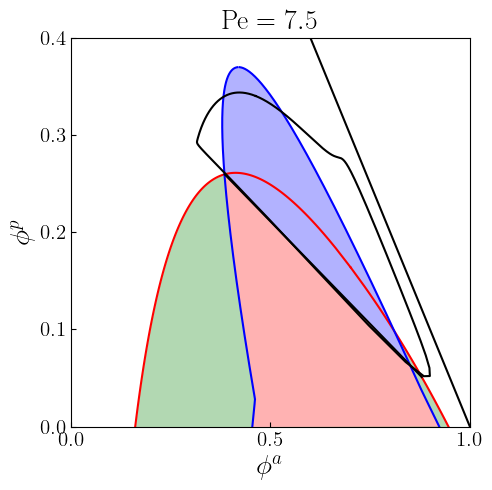

In [38]:
using PyPlot
fig, ax = subplots(1,1,figsize=(5,5))
Pe= 7.5
plot_phase(fig, ax, Pe; Lxs = [])
ax.plot(f[:,1]+f[:,2],f[:,3]; color = "black")
ax.plot(0:0.01:1,1:-0.01:0; color = "black")
display(fig)
fig_name = "phase"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)/Lxs=$(Lxs).pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


In [39]:
Lxs = collect(10:80)
cut_off = 400.0

params = get_stretch_param.(Lxs)
loads = [quiet_load_last_pde(param) for param in params];
fs = [load[2] for load in loads if load[1]&(load[3]>cut_off)];
ts = [load[3] for load in loads if load[1]&(load[3]>cut_off)];
params = [ param for (param,load) in zip(params,loads) if load[1]&(load[3]>cut_off)];
Lxs = [ param["Lx"] for (param,load) in zip(params,loads) if load[1]&(load[3]>cut_off)];

data = abs.(hcat(f_dot.(params, fs)...))

max_speed = 0.2
fs = [circshift(f,(Nx÷2)-argmax(sum(f;dims=3)[:,1])); for (f,c) in zip(fs,data[2,:]) if c<max_speed];
ts = [t for (t,c) in zip(ts,data[2,:]) if c<max_speed];
params = [ param for (param,c) in zip(params,data[2,:]) if c<max_speed];
Lxs = [ param["Lx"] for param in params];
# widths = [Nx+1-argmin(reverse(sign.(mag(f))))-argmin(sign.(mag(f))) for f in fs];
top_gaps = [-maximum(sum(f;dims=2)).+1 for f in fs];
speeds = [c for c in data[2,:] if c<max_speed];


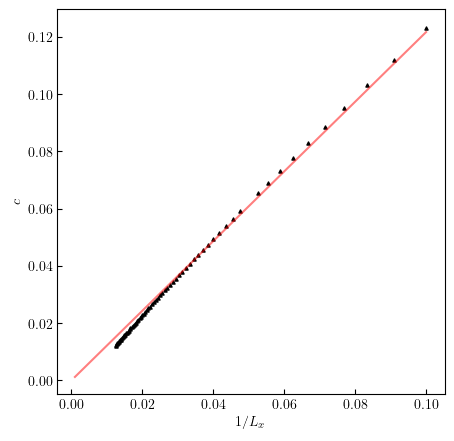

[1.2169566462807508]

In [41]:
# Dispaly Profile
using PyPlot
PyPlot.close("all")
rc("text", usetex=true)
fig, ax = subplots(1,1,figsize=(5,5))

# X = hcat(Lxs.^(-1),ones(length(Lxs)))
# y = speeds
# beta = (X'*X)\X'*y
# xx = 0.001:0.001:0.2
# XX = hcat(xx.^(1),ones(length(xx)))
# lin_speeds = XX*beta
X = hcat(Lxs.^(-1))
y = speeds
beta = (X'*X)\X'*y
xx = 0.001:0.001:0.1
XX = hcat(xx.^(1))
lin_speeds = XX*beta
ax.plot( xx, lin_speeds; color = "red", alpha = 0.5, )
ax.scatter(Lxs.^(-1), speeds; color = "black", s = 5, marker= "^")
        # ax.get_xaxis().set_ticks(0:10.0:Lx)
        # ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
        # ax.set_xlabel(L"x", fontsize = 15)
        #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
        # ax.set_aspect((Lx/(1.25)))
        # ax.axis([0,Lx,-0.25,1.0])
        ax.tick_params(direction = "in")
# ax.legend(loc= "upper right", fontsize = 12)
ax.set_xlabel(L"1/L_x", fontsize = 10)
ax.set_ylabel(L"c", fontsize = 10)
print(beta)
display(fig)
fig_name = "fits"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)/speed.pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


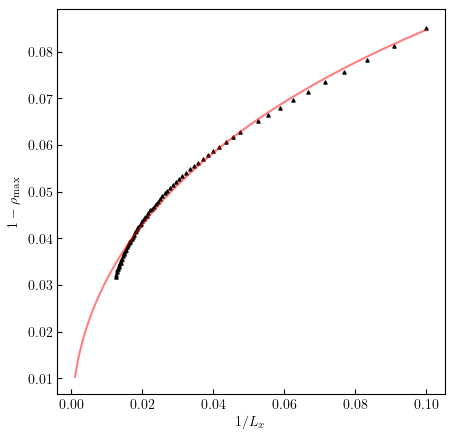

[-0.20620957758360944, 0.33300736251455787]

In [44]:
using PyPlot
PyPlot.close("all")
rc("text", usetex=true)
fig, ax = subplots(1,1,figsize=(5,5))
y = top_gaps

# Ls = [ Lx for (Lx,w) in zip(Ls,widths) if w<100];
# widths = [Nx+1-argmin(reverse(sign.(mag(f))))-argmin(sign.(mag(f))) for f in fs];

X = hcat(Lxs.^(-1),Lxs.^(-1/2))
beta = (X'*X)\X'*y
xx = 0.001:0.001:0.1
XX = hcat(xx.^(1),xx.^(1/2))
lin_speeds = XX*beta
# X = hcat(Ls.^(-1))
# beta = (X'*X)\X'*y
# xx = 0.001:0.001:0.1
# XX = hcat(xx.^(1))
# lin_speeds = XX*beta
ax.plot( xx, lin_speeds; color = "red", alpha = 0.5, )
ax.scatter(Lxs.^(-1), y; color = "black", s = 5, marker= "^")
        # ax.get_xaxis().set_ticks(0:10.0:Lx)
        # ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
        # ax.set_xlabel(L"x", fontsize = 15)
        #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
        # ax.set_aspect((Lx/(1.25)))
        # ax.axis([0,Lx,-0.25,1.0])
        ax.tick_params(direction = "in")
# ax.legend(loc= "upper right", fontsize = 12)
ax.set_xlabel(L"1/L_x", fontsize = 10)
ax.set_ylabel(L"1-\rho_{\max}", fontsize = 10)
print(beta)
display(fig)
fig_name = "fits"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)/rho.pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


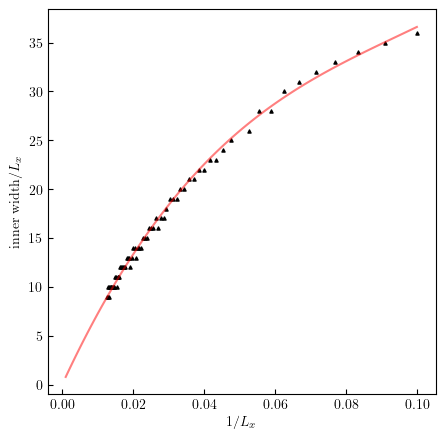

[786.4460323146641, -6491.078478767999, 22866.154778197997]

In [103]:
using PyPlot
PyPlot.close("all")
rc("text", usetex=true)
fig, ax = subplots(1,1,figsize=(5,5))

@unpack Δx = param
function inner_region(f)
    df= (f - circshift(f, (1,0)))/Δx
    drhoa = df[:,1]+df[:,2].+0.02
    return Nx+1-argmin(reverse(sign.(drhoa)))-argmin(sign.(drhoa))
end 
widths = [inner_region(f) for (f,Lx) in zip(fs,Lxs) if Lx<80];
Ls = [ Lx for (Lx,w) in zip(Lxs,widths)];

y = widths
X = hcat(Ls.^(-1),Ls.^(-2),Ls.^(-3))
beta = (X'*X)\X'*y
xx = 0.001:0.001:0.1
XX = hcat(xx.^(1),xx.^(2),xx.^(3))
lin_speeds = XX*beta
# X = hcat(Ls.^(-1))
# beta = (X'*X)\X'*y
# xx = 0.001:0.001:0.1
# XX = hcat(xx.^(1))
# lin_speeds = XX*beta
ax.plot( xx, lin_speeds; color = "red", alpha = 0.5, )
ax.scatter(Ls.^(-1), y; color = "black", s = 5, marker= "^")
        # ax.get_xaxis().set_ticks(0:10.0:Lx)
        # ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
        # ax.set_xlabel(L"x", fontsize = 15)
        #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
        # ax.set_aspect((Lx/(1.25)))
        # ax.axis([0,Lx,-0.25,1.0])
        ax.tick_params(direction = "in")
# ax.legend(loc= "upper right", fontsize = 12)
ax.set_xlabel(L"1/L_x", fontsize = 10)
ax.set_ylabel(L"\mathrm{inner~width}/L_x", fontsize = 10)
print(beta)
display(fig)
fig_name = "fits"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)/inner.pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


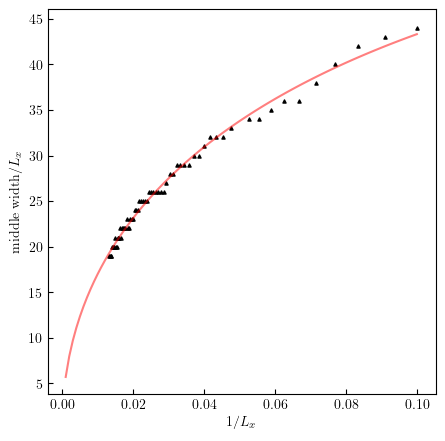

[185.05918914687464, -151.9205180631191]

In [90]:
using PyPlot
PyPlot.close("all")
rc("text", usetex=true)
fig, ax = subplots(1,1,figsize=(5,5))

@unpack Δx = param
function middle_region(f,Lx)
    df= (f - circshift(f, (1,0)))/Δx/sqrt(Lx)
    drhoa = (df[:,1]+df[:,2]).-0.002
    return Nx+1-argmin(reverse(sign.(-drhoa)))-argmin(sign.(-drhoa))
end 
widths = [middle_region(f,Lx) for (f,Lx) in zip(fs,Lxs) if middle_region(f)<100];

y = widths
Ls = [ Lx for (Lx,w) in zip(Lxs,widths) if w<50];
# widths = [Nx+1-argmin(reverse(sign.(mag(f))))-argmin(sign.(mag(f))) for f in fs];

X = hcat(Ls.^(-1/2),Ls.^(-1))
beta = (X'*X)\X'*y
xx = 0.001:0.001:0.1
XX = hcat(xx.^(1/2),xx.^(1))
lin_speeds = XX*beta
# X = hcat(Ls.^(-1))
# beta = (X'*X)\X'*y
# xx = 0.001:0.001:0.1
# XX = hcat(xx.^(1))
# lin_speeds = XX*beta
ax.plot( xx, lin_speeds; color = "red", alpha = 0.5, )
ax.scatter(Ls.^(-1), y; color = "black", s = 5, marker= "^")
        # ax.get_xaxis().set_ticks(0:10.0:Lx)
        # ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
        # ax.set_xlabel(L"x", fontsize = 15)
        #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
        # ax.set_aspect((Lx/(1.25)))
        # ax.axis([0,Lx,-0.25,1.0])
        ax.tick_params(direction = "in")
# ax.legend(loc= "upper right", fontsize = 12)
ax.set_xlabel(L"1/L_x", fontsize = 10)
ax.set_ylabel(L"\mathrm{middle~width}/L_x", fontsize = 10)
print(beta)
display(fig)
fig_name = "fits"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_stretch/$(fig_name)/mid.pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


In [62]:
function get_stretch_param(Lx)
    param = get_grid_param(21,11)
    @unpack Nx = param
    param["save_interval"] = 100.0
    param["T"] = 2000.0
    param["name"] = "soliton_stretch"
    param["Lx"] = Float64(Lx)
    param["Δx"] = Float64(Lx/Nx)
    return param
end
Lx = Int64(74 + 4)
param = get_stretch_param(Lx)
load_and_run_pde(param)

load at t = 0.0


InterruptException: InterruptException: